In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#File Access
import pandas as pd
import numpy as np
hpp = pd.read_csv('/content/drive/MyDrive/Dataset_2/Housing Price Prediction Data - Housing Price Prediction Data.csv')

In [33]:
hpp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1,Rural,1969,215355.2836
1,2459,3.0,2,Rural,1980,195014.2216
2,1860,2.0,1,Suburb,1970,306891.0121
3,2294,2.0,1,Urban,1996,206786.7872
4,2130,5.0,2,Suburb,2001,272436.2391


# **Removing Null Values**

In [34]:
#Checking for Null value
hpp.isnull().sum()

,0
SquareFeet,0
Bedrooms,35
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [35]:
#Removing Null value
hpp['Bedrooms'].fillna(hpp['Bedrooms'].median(), inplace=True)
hpp.isnull().sum()

<ipython-input-35-39caf34570fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hpp['Bedrooms'].fillna(hpp['Bedrooms'].median(), inplace=True)


,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


# **Removing duplicate rows (if present)**

In [36]:
hpp.duplicated().sum()
#No duplicate row present

0

# **Handling categorical variables [This DS is nominal]**

In [37]:
hpp['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [38]:
# Transforming 'Neighborhood' col
neighbor_cl = pd.get_dummies(hpp['Neighborhood'])
neighbor_cl.head()

,Rural,Suburb,Urban
0,True,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


# **Feature scaling**

In [39]:
#Using MinMax scaler
from sklearn.preprocessing import MinMaxScaler

MM_scaler = MinMaxScaler()

num_cl = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']
hpp[num_cl] = MM_scaler.fit_transform(hpp[num_cl])

hpp.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,Rural,0.267606,215355.28360
1,0.729865,0.333333,0.5,Rural,0.422535,195014.22160
2,0.430215,0.000000,0.0,Suburb,0.281690,306891.01210
3,0.647324,0.000000,0.0,Urban,0.647887,206786.78720
4,0.565283,1.000000,0.5,Suburb,0.718310,272436.23910
5,0.547774,0.000000,1.0,Suburb,0.985915,198208.80390
6,0.862431,0.000000,0.0,Suburb,0.605634,343429.31910
7,0.522261,0.666667,1.0,Rural,0.098592,184992.32130
8,0.819410,0.666667,1.0,Urban,0.126761,377998.58820
9,0.060530,0.666667,0.5,Urban,0.760563,95961.92601


# **Correlation as feature selection**

In [40]:
num_col = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

housing_corr = hpp[num_col].corr()
print(housing_corr)

            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.003843  -0.020497   0.009925  0.743367
Bedrooms     -0.003843  1.000000   0.036234   0.010835  0.070281
Bathrooms    -0.020497  0.036234   1.000000   0.025003  0.033923
YearBuilt     0.009925  0.010835   0.025003   1.000000  0.009422
Price         0.743367  0.070281   0.033923   0.009422  1.000000


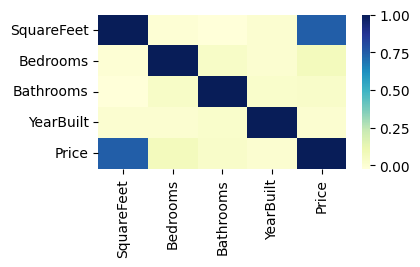

In [41]:
# Visualize the correlation matrix using a heatmap [Run 'File access' cell before running this cell]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.heatmap(housing_corr, cmap='YlGnBu')
plt.show()

In [42]:
#From looking at the heatmap we find Price & Squarefeet has the stronger correlation, but due to relevancy of dataset we can't remove anyone of that. So, we check the next stong connection and choose it to remove.
corr_w_price = housing_corr['Price']
print(corr_w_price)


SquareFeet    0.743367
Bedrooms      0.070281
Bathrooms     0.033923
YearBuilt     0.009422
Price         1.000000
Name: Price, dtype: float64


# **ASSIGNMENT-05 : Linear and Logistic Regression**

In [43]:
#Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

hpp = pd.concat([hpp, neighbor_cl], axis=1)
hpp = hpp.drop('Neighborhood', axis=1)

X = hpp.drop('Price', axis=1)
y = hpp['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5000)
print(X_train,y_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

      SquareFeet  Bedrooms  Bathrooms  YearBuilt  Rural  Suburb  Urban
2379    0.865433  0.000000        1.0   0.591549   True   False  False
290     0.109555  1.000000        1.0   0.422535  False    True  False
1488    0.732366  1.000000        0.0   0.169014  False    True  False
1703    0.462231  0.000000        0.0   0.056338  False   False   True
2023    0.560780  1.000000        1.0   0.774648  False    True  False
...          ...       ...        ...        ...    ...     ...    ...
1949    0.408204  0.666667        1.0   0.422535  False    True  False
3201    0.181591  0.333333        1.0   0.788732  False   False   True
2657    0.645823  0.666667        0.5   0.563380   True   False  False
1474    0.995998  0.333333        0.0   0.450704  False   False   True
411     0.864932  0.000000        0.0   0.197183  False   False   True

[2801 rows x 7 columns] 2379    285608.3006
290     117989.3568
1488    376283.0944
1703    164156.1397
2023    172278.3750
           ...     
194

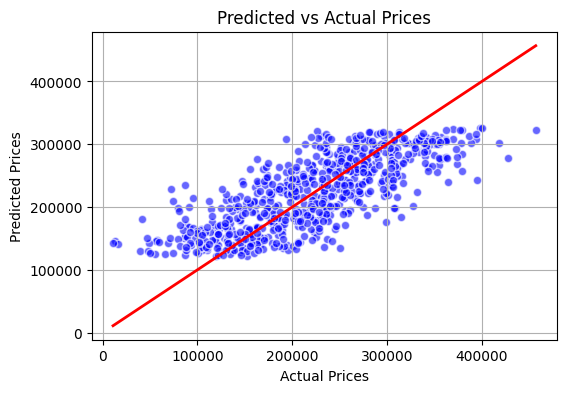

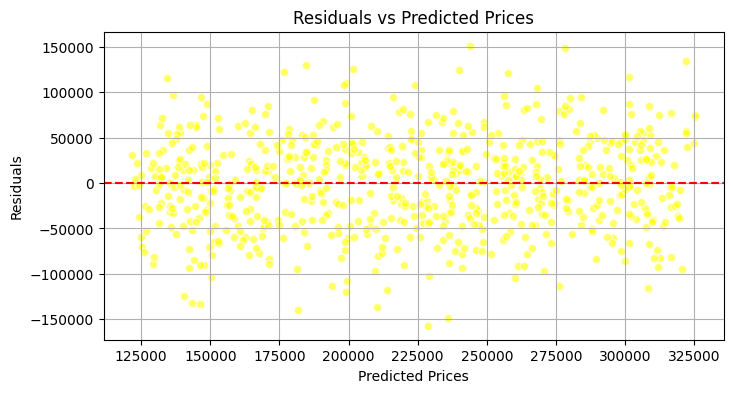

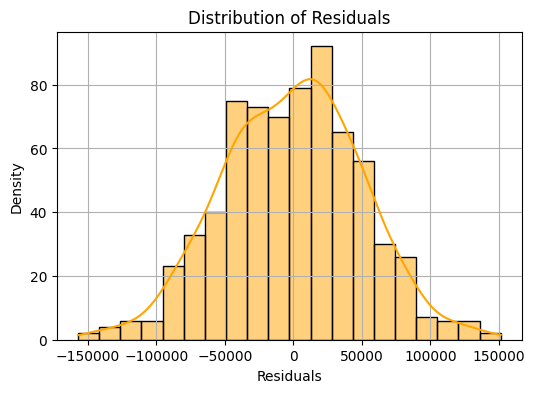

In [44]:
# Visualize Predictions vs Actual Values
# This part is for oneself, to understand the graph. Not necessary in case of modeing unless told
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Residuals plot (Errors = Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, color='yellow', edgecolor='w', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Accuracy: 0.8773181169757489
Confusion Matrix:
[[602  14]
 [ 72  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       616
           1       0.48      0.15      0.23        85

    accuracy                           0.88       701
   macro avg       0.69      0.57      0.58       701
weighted avg       0.84      0.88      0.85       701



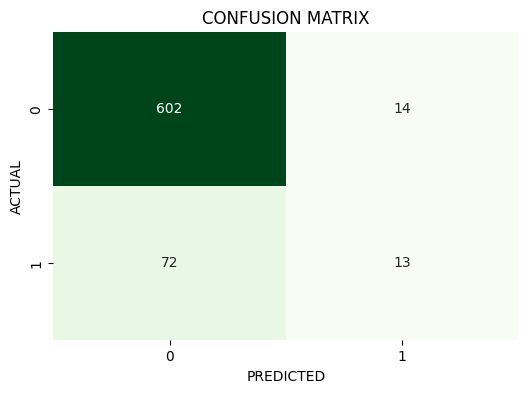

In [45]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
threshold = 310000
hpp['Price_Class'] = (hpp['Price'] > threshold).astype(int)

X = hpp.drop(['Price', 'Price_Class'], axis=1)
y = hpp['Price_Class']  # Target variable for classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

model = LogisticRegression()
model.fit(X_train, y_train)

y_Pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_Pred)
conf_matrix = confusion_matrix(y_test, y_Pred)
class_report = classification_report(y_test, y_Pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('CONFUSION MATRIX')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()